# Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import json
from prettytable import PrettyTable
import requests
import csv

# Extract the data from openAQ API 

In [2]:
result = requests.get("https://api.openaq.org/v1/locations?country[]=IN&parameter[]=co&parameter[]=pm25&parameter[]=pm10&parameter[]=so2&parameter[]=no2&parameter[]=o3&has_geo=true")
result.status_code

200

# Visualize the data as in JSON format

In [3]:
json_data = result.json()
json_data

{'meta': {'name': 'openaq-api',
  'license': 'CC BY 4.0',
  'website': 'https://docs.openaq.org/',
  'page': 1,
  'limit': 100,
  'found': 321},
 'results': [{'id': 'IN-35',
   'country': 'IN',
   'city': 'Agra',
   'cities': ['Agra'],
   'location': 'Sanjay Palace, Agra - UPPCB',
   'locations': ['Sanjay Palace', 'Sanjay Palace, Agra - UPPCB'],
   'sourceName': 'caaqm',
   'sourceNames': ['CPCB', 'data.gov.in', 'caaqm'],
   'sourceType': 'government',
   'sourceTypes': ['government'],
   'coordinates': {'longitude': 78.00598, 'latitude': 27.19866},
   'firstUpdated': '2016-03-22T00:20:00.000Z',
   'lastUpdated': '2020-10-11T12:45:00.000Z',
   'parameters': ['co', 'no2', 'o3', 'pm25', 'so2'],
   'countsByMeasurement': [{'parameter': 'co', 'count': 58290},
    {'parameter': 'no2', 'count': 34388},
    {'parameter': 'o3', 'count': 59983},
    {'parameter': 'pm25', 'count': 58829},
    {'parameter': 'so2', 'count': 42840}],
   'count': 254330},
  {'id': 'IN-101',
   'country': 'IN',
   'c

In [4]:
column_data = json_data['results']
column_data

[{'id': 'IN-35',
  'country': 'IN',
  'city': 'Agra',
  'cities': ['Agra'],
  'location': 'Sanjay Palace, Agra - UPPCB',
  'locations': ['Sanjay Palace', 'Sanjay Palace, Agra - UPPCB'],
  'sourceName': 'caaqm',
  'sourceNames': ['CPCB', 'data.gov.in', 'caaqm'],
  'sourceType': 'government',
  'sourceTypes': ['government'],
  'coordinates': {'longitude': 78.00598, 'latitude': 27.19866},
  'firstUpdated': '2016-03-22T00:20:00.000Z',
  'lastUpdated': '2020-10-11T12:45:00.000Z',
  'parameters': ['co', 'no2', 'o3', 'pm25', 'so2'],
  'countsByMeasurement': [{'parameter': 'co', 'count': 58290},
   {'parameter': 'no2', 'count': 34388},
   {'parameter': 'o3', 'count': 59983},
   {'parameter': 'pm25', 'count': 58829},
   {'parameter': 'so2', 'count': 42840}],
  'count': 254330},
 {'id': 'IN-101',
  'country': 'IN',
  'city': 'Ahmedabad',
  'cities': ['Ahmedabad', 'On the terrace of Water distribution Center'],
  'location': 'Maninagar, Ahmedabad - GPCB',
  'locations': ['Maninagar, Ahmedabad - G

# Extract information from json data in the form of table 

Make a Pretty Table.

Select then columns for the table.

Add the data row by row .

In [5]:
tableobj = PrettyTable()
for col in column_data:
    mylist = col['countsByMeasurement']
    loc_id = col['id']
    city_name = col['city']
    logitude = col['coordinates']['longitude']
    latitude = col['coordinates']['latitude']
    tot_count = col['count']
    for d in mylist:
        if d['parameter']=='co':
            co_count = d['count']
        elif d['parameter']=='no2':
            no2_count = d['count']
        elif d['parameter']=='o3':
            o3_count = d['count']
        elif d['parameter']=='pm25':
            pm25_count = d['count']
        elif d['parameter']=='so2':
            so2_count = d['count']
    tableobj.add_row([loc_id,city_name,logitude,latitude,co_count,no2_count,o3_count,pm25_count,so2_count,tot_count])
    
tableobj.field_names = ["Id","City","Longitude","Latitude","CO count","NO2 count","O3 count","PM2.5 count","SO2 count","Total count"]    
print(tableobj)    

+--------+----------------+-----------+----------+----------+-----------+----------+-------------+-----------+-------------+
|   Id   |      City      | Longitude | Latitude | CO count | NO2 count | O3 count | PM2.5 count | SO2 count | Total count |
+--------+----------------+-----------+----------+----------+-----------+----------+-------------+-----------+-------------+
| IN-35  |      Agra      |  78.00598 | 27.19866 |  58290   |   34388   |  59983   |    58829    |   42840   |    254330   |
| IN-101 |   Ahmedabad    |  72.59191 | 23.00266 |  35724   |   36031   |  35811   |    36055    |   35110   |    203494   |
| IN-314 |     Aizawl     |  92.71928 | 23.71763 |   4953   |    4953   |   4953   |     4953    |    4953   |    29718    |
| IN-143 |     Ajmer      |  74.64659 | 26.47086 |  32976   |   32979   |  32627   |    32968    |   32985   |    197510   |
| IN-72  |      Alwar     |  76.61153 | 27.55479 |  37567   |   37579   |  36583   |    37521    |   37525   |    224357   |


# Function to convert Pretty table to csv file 

In [6]:
def ptable_to_csv(table, filename, headers=True):
    """Save PrettyTable results to a CSV file
    :param table:  Pretty Table object to get data from.
    :param filename: Filepath for the output CSV.
    :param headers: Whether to include the header row in the CSV (Boolean).
    :return: None
    """
    raw = table.get_string()
    data = [tuple(filter(None, map(str.strip, splitline)))
            for line in raw.splitlines()
            for splitline in [line.split('|')] if len(splitline) > 1]
    if table.title is not None:
        data = data[1:]
    if not headers:
        data = data[1:]
    with open(filename, 'w') as f:
        for d in data:
            f.write('{}\n'.format(','.join(d)))

# Convert the Pretty Table into csv file 

In [7]:
ptable_to_csv(tableobj,'/Users/Dell/output.csv',True)
df = pd.read_csv("output.csv")
df.head()

,Id,City,Longitude,Latitude,CO count,NO2 count,O3 count,PM2.5 count,SO2 count,Total count
0,IN-35,Agra,78.00598,27.19866,58290,34388,59983,58829,42840,254330
1,IN-101,Ahmedabad,72.59191,23.00266,35724,36031,35811,36055,35110,203494
2,IN-314,Aizawl,92.71928,23.71763,4953,4953,4953,4953,4953,29718
3,IN-143,Ajmer,74.64659,26.47086,32976,32979,32627,32968,32985,197510
4,IN-72,Alwar,76.61153,27.55479,37567,37579,36583,37521,37525,224357


# Exploratry analysis

In [8]:
df.shape

(100, 10)

In [9]:
df.describe()

,Longitude,Latitude,CO count,NO2 count,O3 count,PM2.5 count,SO2 count,Total count
count,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,77.644582,23.242198,20441.50000,20695.260000,18985.560000,20144.570000,18075.140000,106817.300000
std,2.293822,7.104312,13290.07493,12621.317241,12426.335586,12753.983556,11995.223596,68249.171543
min,72.591910,10.942450,1.00000,1.000000,1.000000,1.000000,8.000000,4.000000
25%,77.089645,13.165785,13100.00000,15149.750000,6841.250000,11813.500000,6518.500000,56835.000000
50%,77.245230,28.505295,22393.50000,22449.000000,22030.000000,22383.500000,20163.000000,121674.000000
75%,77.585157,28.655685,29486.00000,29650.750000,27412.750000,29251.500000,25773.000000,155114.250000
max,92.719280,31.620000,64114.00000,64676.000000,59983.000000,58829.000000,43596.000000,254330.000000


# Corelation and Heatmap representaion

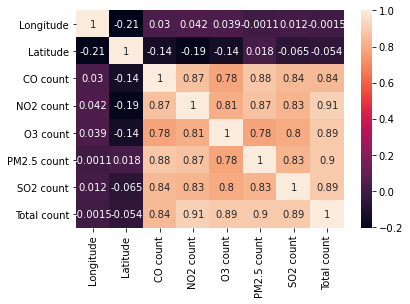

In [10]:
corelation = df.corr()
sns.heatmap(corelation,annot=True)

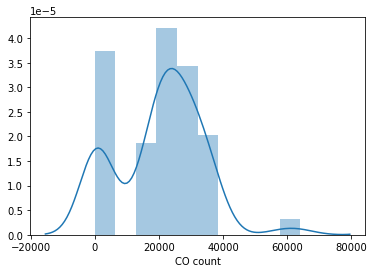

In [11]:
sns.distplot(df['CO count'])

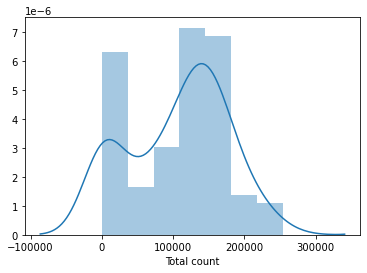

In [12]:
sns.distplot(df['Total count'])

# Box plot for each factor 

Used to identify the outliers 

Text(0.5, 1.0, 'Total count')

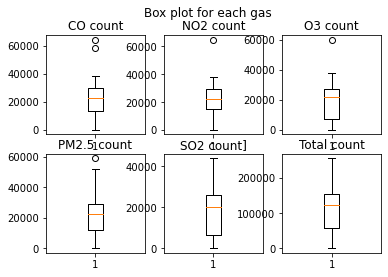

In [14]:
fig, axs = plt.subplots(2,3)
fig.suptitle('Box plot for each gas')
axs[0,0].boxplot(df['CO count'])
axs[0,0].set_title('CO count')
axs[0,1].boxplot(df['NO2 count'])
axs[0,1].set_title('NO2 count')
axs[0,2].boxplot(df['O3 count'])
axs[0,2].set_title('O3 count')
axs[1,0].boxplot(df['PM2.5 count'])
axs[1,0].set_title('PM2.5 count')
axs[1,1].boxplot(df['SO2 count'])
axs[1,1].set_title('SO2 count]')
axs[1,2].boxplot(df['Total count'])
axs[1,2].set_title('Total count')

# Removing Outliers

In [15]:
df = df[df['CO count']<50000]
df = df[df['CO count']>5000]
df.describe()

,Longitude,Latitude,CO count,NO2 count,O3 count,PM2.5 count,SO2 count,Total count
count,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000
mean,77.519827,22.707493,25096.828947,24692.907895,22771.394737,23960.986842,21865.842105,129765.618421
std,1.901271,7.166084,7164.094385,7816.081660,8887.796643,8157.240166,8984.094342,49074.699530
min,72.591910,10.942450,5396.000000,978.000000,1.000000,5397.000000,1063.000000,2990.000000
25%,77.095630,13.047753,20571.750000,20512.750000,18683.000000,18990.500000,17549.000000,109195.750000
50%,77.257680,28.268415,24321.000000,25291.500000,24367.000000,25548.500000,22477.500000,134800.000000
75%,77.591345,28.656300,30729.250000,30340.250000,29087.750000,29822.500000,28035.750000,158600.250000
max,86.945970,31.620000,38014.000000,38292.000000,38005.000000,38015.000000,37525.000000,224357.000000


# Import Libraries for clustering

In [31]:
from sklearn.cluster import KMeans 
x = df.iloc[:,4:9]

# Elbow method 

In [33]:
wcss = []
for i in range (1,6):
    cluster = KMeans(n_clusters = i , init = 'k-means++', random_state=42)
    cluster.fit(x)
    wcss.append(cluster.inertia_)

# Plot for elbow method 

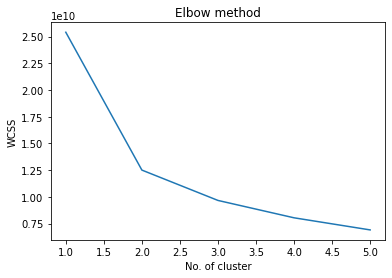

In [34]:
plt.plot(range(1,6),wcss)
plt.title("Elbow method")
plt.xlabel('No. of cluster')
plt.ylabel('WCSS')
plt.show()data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAYgAAAEWCAYAAAB8LwAVAAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAAALEgAACxIB0t1+/AAAADh0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uMy4yLjIsIGh0dHA6Ly9tYXRwbG90bGliLm9yZy+WH4yJAAAgAElEQVR4nO3deXxV1b3//9cnA2MgDEkYQsIURq0oBFCpiNgi4m1729sB9Nba+i3aqlWvnWx/j7bf9tfWWjsP11Jrrb0K2sFbq4LgBI5IQgGFMEQEEkASZsKc5PP9Y+/gIZ5MkJOd4f18PM4j++y19tmfbEI+WWvttba5OyIiIrUlRR2AiIi0TkoQIiISlxKEiIjEpQQhIiJxKUGIiEhcShAiIhKXEoS0W2Z2nZm9FPPezSwvypiak5l9x8z+p5k+67RrJQJKENLGmdkWMztqZhUxr19HHVdzM7NpZlYadRzSsaREHYBIM/iQuz8TdRAi7Y1aENLRzDKzzWa228x+bGZJAGaWZGb/n5ltNbMyM3vQzNLDsj+Z2R3hdnbYVfXF8H2eme01M6t9orDb5mUz+5mZ7Q/Pe3G4vyQ8z2di6nc2s3vMbJuZ7TKze82sq5l1BxYCA2NaSQPDwzqFsR4ys7Vmlh/zeWPM7IXw3GvN7MMxZX3N7HEzO2hmrwPDm/9SS1unBCEdzUeBfGA88BHgc+H+68LXZcAwIA2o6apaCkwLty8FNodfAaYCL3rda9ZMBtYAfYGHgQXARCAP+E/g12aWFtb9ETASOD8szwa+5e6HgSuBHe6eFr52hMd8OPzMXsDjNTGbWSrwT2AxkAXcAjxkZqPC434DHAMGhNeg5jqIvMvd29ULuB8oA95sRN2pwEqgEvh4rbLPAJvC12ei/r70qvPfcAtQAeyPeX0+LLsOeCmmrgMzY95/EXg23H4W+GJM2SjgJEE37PDwc5OAe4EbgNKw3p+A/6ojtuuATTHv3xfG0C9m3x6ChGDAYWB4TNlFwNvh9rSac8aUfwd4Jub9WOBouH0J8A6QFFM+PzwmOfzeRseU/SD2Wumll7u3yxbEA8DMRtbdRvCf+OHYnWbWB/g2wV9/k4Bvm1nv5gtRmtm/u3uvmNfv66lbErO9FajpqhkYvo8tSyH4Zf4WQRI6n+AX7xPAjvCv8UsJWhh12RWzfRTA3WvvSwMygW5AYdgltB9YFO6vzzsx20eALmaWEn4/Je5eXet7yg4/M4X3XguR07S7BOHuy4C9sfvMbLiZLTKzQjN70cxGh3W3uPsaoLrWx1wBLHH3ve6+D1hC45OOtG45Mdu5QE1XzQ5gcK2ySt79Bb8U+DjQyd23h++vBXoDq5ohrt0EyeKcmESX7u413U9NXXZ5B5BTM8YSygW2A+UE31vtayFymnaXIOowD7jF3ScAXwZ+20D9bE7/66o03Cdt31fMrLeZ5QC3Ao+E++cDt5vZ0HBM4AfAI+5eGZYvBW4GloXvXyDo13/J3avONqjwL/3fAz8zsyw4NSB+RVhlF9C3ZuC8EZYTdFl91cxSzWwa8CFgQRjv34HvmFk3MxtL0KUqcpp2nyDC/+wXA38xs1XA7wgG5uo9LM4+PTij9fpnrXkQj9VT9x9AIcFf/U8Cfwj33w/8mSABvE0wgHtLzHFLgR68myBeIugSWkbz+RpQDLxmZgeBZwjGQnD39QRJbHPYBTWw7o8Bdz9BMIB9JUHr5LfAteHnQJDs0gi6qB4A/tiM34e0E+be/n7vmdkQ4Al3P9fMegIb3L3OpGBmD4T1/xq+nwNMc/cbwve/A15w9/mJjl1EpLVo9y0Idz8IvG1mnwCwwLgGDnsamBF2RfQGZoT7REQ6jHaXIMxsPvAqMMrMSs3seuAa4HozWw2sJbj/HTObGC5f8Angd2a2FsDd9wLfA1aEr++G+0REOox22cUkIiJnr921IEREpHm0q8X6MjIyfMiQIVGHISLSZhQWFu5297gTMttVghgyZAgFBQVRhyEi0maYWZ2z6NXFJCIicSlBiIhIXEoQIiISlxKEiIjEpQQhIiJxKUGIiEhcShAiIhJXh08Qxyur+N3StyjYoqWWRERidfgEUV0Nf3x5C997Yh3V1VqXSkSkRsIShJnlmNnzZlZkZmvN7NY4daaZ2QEzWxW+vhVTNtPMNphZsZl9PVFxdu2UzB0zRrK69ABPvLEzUacREWlzEtmCqATucPcxwIXATeGjDWt70d3PD1/fBTCzZOA3BE/DGgvMqePYZvGx8YMYM6Andy9az/HKs356pIhIu5CwBOHuO919Zbh9CCii8c91ngQUu/vm8NGJCwif4ZAIyUnGN2aNpnTfUf78ap3LkoiIdCgtMgYRPgL0AoIHqdd2kZmtNrOFZnZOuC8bKImpU0rjk8sZuWREJlNHZvLLZzex/8iJRJ5KRKRNSHiCMLM04G/AbeHjP2OtBAa7+zjgV8D/1hwW56PijiCb2VwzKzCzgvLy8rOK9RuzRlNxvJJfP1d8Vp8jItIeJDRBmFkqQXJ4yN3/Xrvc3Q+6e0W4/RSQamYZBC2GnJiqg4Ad8c7h7vPcPd/d8zMz4y5p3mij+/fk4xMG8eCrW9m258hZfZaISFuXyLuYDPgDUOTuP62jTv+wHmY2KYxnD8FzoEeY2VAz6wTMBh5PVKyx/uuDo0hKgrufXt8SpxMRabUS2YKYAnwamB5zG+ssM7vRzG4M63wceNPMVgO/BGZ7oBK4GXiaYHD7UXdfm8BYT+mf3oW5lwzjiTU7WVWyvyVOKSLSKpl7+5kclp+f783xRLmK45VM+/HzDMtI45EbLiRs5IiItDtmVuju+fHKOvxM6njSOqdw2wdG8vqWvSxZtyvqcEREIqEEUYfZE3MYntmduxau52RVddThiIi0OCWIOqQkJ3HnlWPYvPswC17fFnU4IiItTgmiHpePyWLy0D78/JlNHDp2MupwRERalBJEPcyMb141hj2HT3Dv0reiDkdEpEUpQTTgvEG9+Mj5A7nvxbfZeeBo1OGIiLQYJYhG+PKMUbjDTxZvjDoUEZEWowTRCDl9unHdlCH8bWUp63bUXk5KRKR9UoJopJum5ZHeNZUfLiyKOhQRkRahBNFI6d1SuWX6CF7ctJulG89u1VgRkbZACaIJPn3hYHL7dOMHTxZRpedXi0g7pwTRBJ1SkvjazNFs2HWIvxWWRh2OiEhCKUE00az39eeC3F78ZMkGjpyojDocEZGEUYJoIjPjm7PGsOvgce578e2owxERSRgliDOQP6QPM8/pz++WvkX5oeNRhyMikhBKEGfoa1eO5nhlNT9/RpPnRKR9UoI4Q0MzunPN5FwWrCihuOxQ1OGIiDQ7JYiz8KXLR9AtNZm7Fur51SLS/iQsQZhZjpk9b2ZFZrbWzG6NU+caM1sTvl4xs3ExZVvM7I3wWdZn/xzRBOib1pkvXDacZ4rKeG3znqjDERFpVolsQVQCd7j7GOBC4CYzG1urztvApe5+HvA9YF6t8svc/fy6npfaGnxuylAGpnfhB08VUa3JcyLSjiQsQbj7TndfGW4fAoqA7Fp1XnH3feHb14BBiYonUbqkJvPlK0axpvQA/1yzI+pwRESaTYuMQZjZEOACYHk91a4HFsa8d2CxmRWa2dx6PnuumRWYWUF5eTRrJP37+dmcM7Andy/awLGTVZHEICLS3BKeIMwsDfgbcJu7x10r28wuI0gQX4vZPcXdxwNXEnRPTY13rLvPc/d8d8/PzMxs5ugbJynJ+MasMWzff5QHX90SSQwiIs0toQnCzFIJksND7v73OuqcB9wHfMTdT430uvuO8GsZ8BgwKZGxnq0peRlMG5XJr54rZt/hE1GHIyJy1hJ5F5MBfwCK3P2nddTJBf4OfNrdN8bs725mPWq2gRnAm4mKtbnceeUYDh+v5FfPFUcdiojIWUtJ4GdPAT4NvGFmq8J93wByAdz9XuBbQF/gt0E+oTK8Y6kf8Fi4LwV42N0XJTDWZjGqfw8+mZ/Dn1/bwmcuHszgvt2jDklE5IyZe/u5NTM/P98LCqKdMlF28BiX/vgFpo/O4jfXjI80FhGRhphZYV1TCTSTupll9ezC3KnDePKNnazctq/hA0REWikliASYO3UYmT0684Mni2hPLTQR6ViUIBKge+cUbv/ASAq27uPpte9EHY6IyBlRgkiQT+YPYkRWGj9atIGTVdVRhyMi0mRKEAmSkpzEnbNG8/buwzy8fFvU4YiINJkSRAJdNiqLi4b15efPbOTgsZNRhyMi0iRKEAlkZnzzqjHsO3KS/37hrajDERFpEiWIBDs3O52PXpDN/S+9zfb9R6MOR0Sk0ZQgWsAdM0biwE+e3hB1KCIijaYE0QIG9e7G56YM5bFV23lz+4GowxERaRQliBbyxcuG06trKj9cqMlzItI2KEG0kJ5dUvnS5SN4uXgPL2yM5sFGIiJNoQTRgq6ZPJghfbvxw6eKqNTkORFp5ZQgWlCnlCS+NnM0G3dV8NfC0qjDERGplxJEC5t5bn8mDO7NT5ds5PDxyqjDERGpkxJECzMLnl9ddug4v39xc9ThiIjUSQkiAhMG92bW+/ozb9lmyg4dizocEZG4lCAi8tUrRnOyqpqfLdkUdSgiInElLEGYWY6ZPW9mRWa21sxujVPHzOyXZlZsZmvMbHxM2Uwz2xCWfT1RcUZlSEZ3rpk8mEdWbGPjrkNRhyMi8h6JbEFUAne4+xjgQuAmMxtbq86VwIjwNRf4bwAzSwZ+E5aPBebEObbN+9LlI+jeOYW7Fq6POhQRkfdIWIJw953uvjLcPgQUAdm1qn0EeNADrwG9zGwAMAkodvfN7n4CWBDWbVf6dO/ETZfl8dz6Ml4p3h11OCIip2mRMQgzGwJcACyvVZQNlMS8Lw331bU/3mfPNbMCMysoL297M5Svu3gI2b268v2niqiu1hIcItJ6JDxBmFka8DfgNnc/WLs4ziFez/737nSf5+757p6fmZl5dsFGoEtqMl+5YhRrdxzkH6u3Rx2OiMgpCU0QZpZKkBwecve/x6lSCuTEvB8E7Khnf7v04XEDOTe7J/c8vZFjJ6uiDkdEBEjsXUwG/AEocvef1lHtceDa8G6mC4ED7r4TWAGMMLOhZtYJmB3WbZeSkoLJc9v3H+WPL2+JOhwREQBSEvjZU4BPA2+Y2apw3zeAXAB3vxd4CpgFFANHgM+GZZVmdjPwNJAM3O/uaxMYa+QuHp7B5aOz+O3zxXxqYg59uneKOiQR6eCsPT2bID8/3wsKCqIO44xt2nWIK36+jGsvGsJ3PnxO1OGISAdgZoXunh+vTDOpW5ER/XrwqYm5/M9rW3l79+GowxGRDk4JopW5/YMj6JSSxN2LNHlORKKlBNHKZPXowg1Th7PwzXco3Lo36nBEpANTgmiFPj91KFk9OvP9J/X8ahGJjhJEK9StUwp3zBjJym37WfjmO1GHIyIdlBJEK/XxCTmM6teDHy1az4lKPb9aRFqeEkQrlZxkfH3WaLbuOcJDy7dGHY6IdEBKEK3YtJGZvD8vg188u4kDR09GHY6IdDBKEK2YmXHnrNEcOHqS375QHHU4ItLBKEG0cucMTOejF2Tzx5e3ULrvSNThiEgHogTRBnx5xigMuOfpDVGHIiIdiBJEGzCwV1euf/9Q/nfVDt4oPRB1OCLSQShBtBE3ThtOn+6d+P5T6zR5TkRahBJEG9GzSyq3Xj6C1zbv5bn1ZVGHIyIdgBJEG3L15FyGZnTnhwvXU1mlyXMiklhKEG1IanISX5s5muKyCh4tKI06HBFp55Qg2pgrzulH/uDe/HTJRiqOV0Ydjoi0Y0oQbYyZ8c2rxrC74jjzlm2OOhwRaccSliDM7H4zKzOzN+so/4qZrQpfb5pZlZn1Ccu2mNkbYVnbfYZoglyQ25urzhvA75dtZtfBY1GHIyLtVCJbEA8AM+sqdPcfu/v57n4+cCew1N1jn5BzWVge91mpHd3XrhhNZXU1P1uyMepQRKSdSliCcPdlQGMfiTYHmJ+oWNqj3L7duPaiITxaUMKGdw5FHY6ItEORj0GYWTeClsbfYnY7sNjMCs1sbgPHzzWzAjMrKC8vT2Sorc4t0/NI65zCDxcWRR2KiLRDkScI4EPAy7W6l6a4+3jgSuAmM5ta18HuPs/d8909PzMzM9Gxtiq9unXi5ul5vLChnJc27Y46HBFpZ1pDgphNre4ld98Rfi0DHgMmRRBXm3DtRUMY1LsrP3iqiOpqLcEhIs2n3gRhZhPNrH/M+2vN7B9m9suaO47OhpmlA5cC/4jZ193MetRsAzOAuHdCCXRJTeYrV4xi3c6DPPav7VGHIyLtSEMtiN8BJwDCbp67gAeBA8C8+g40s/nAq8AoMys1s+vN7EYzuzGm2keBxe5+OGZfP+AlM1sNvA486e6LmvJNdTQfOm8g5w1K557FGzh2sirqcESknbD6VgY1s9XuPi7c/g1Q7u7fCd+vCm9RbTXy8/O9oKBjTpt4bfMeZs97ja9cMYqbLsuLOhwRaSPMrLCu6QQNtSCSzSwl3L4ceC6mLCVOfYnIhcP68oEx/fjvF95iT8XxqMMRkXagoQQxH1hqZv8AjgIvAphZHkE3k7QiX79yNEdPVvHLZzdFHYqItAP1Jgh3/z5wB8Gs6Pf7u/1RScAtiQ1NmiovK405k3J4aPk2NpdXRB2OiLRxDd3F1A0odPfH3P2wmY0ys9uBc919ZcuEKE1x6+Uj6ZySxI8WrY86FBFp4xrqYloEDIFT3UqvAsMIJq/9MLGhyZnI7NGZGy8dztNrd7FiS2NXOhERea+GEkRvd6/p0P4MMN/dbyGY4fxvCY1Mztj/uWQY/Xp25vtPFun51SJyxhpKELG/XaYDSwDc/QSgZ162Ul07JXPHjFGsKtnPk2/sjDocEWmjGkoQa8zsnnDcIQ9YDGBmvRIemZyV/xg/iNH9e3D3og0cr9TkORFpuoYSxOeB3QTjEDPc/Ui4fyxwTwLjkrOUnGTcOWsM2/Ye4c+vbo06HBFpgxpKEGnAP939VndfHbP/IMEAtrRil47M5JIRGfzquWIOHDkZdTgi0sY0lCB+BWTE2Z8N/KL5w5Hm9o1ZYzh47CS/eaE46lBEpI1pKEG8z92X1t7p7k8D5yUmJGlOYwb05D/GD+KBl7dQsvdIwweIiIQaShCpZ1gmrcgdM0aSlAQ/fnpD1KGISBvSUILYZGazau80syuBzYkJSZrbgPSu/J/3D+Px1TtYU7o/6nBEpI1oKEHcBvzczB4ws1vC158Ixh9uTXx40lxuuHQYfbt30uQ5EWm0hhLEVcD1wMvA4PC1FDjP3TcmODZpRj26pHLbB0ey/O29PFNUFnU4ItIGNJQgBgE/Au4G8gmeLrcL6JbguCQBZk/MYVhmd+5aWERllSbCi0j9Glru+8vufjHBY0C/AewFPge8aWbr6jvWzO43szIzi/s8aTObZmYHzGxV+PpWTNlMM9tgZsVm9vUmf1cSV2pyEl+fOZq3yg+zYEVJ1OGISCvXUAuiRlegJ5AevnYAyxs45gFgZgN1XnT388PXdwHMLBn4DcGCgGOBOWY2tpFxSgM+OLYfk4b24efPbKTieGXU4YhIK9bQ8yDmmdnLwCPARcArwCfcPd/dP1vfse6+jKDF0VSTgGJ33xwuCrgA+MgZfI7EYWZ8c9YYdlec4HdL34o6HBFpxRpqQeQCnYF3gO1AKdCc90leZGarzWyhmZ0T7ssGYvs/SsN9cZnZXDMrMLOC8vLyZgyt/RqX04sPjRvI71/czDsHjkUdjoi0Ug2NQcwEJvLuwnx3ACvMbLGZ/d+zPPdKYLC7jyNY0uN/w/0WL5R6YpwXtmjyMzMzzzKkjuOrV4yiuhp+sliT50QkvgbHIDzwJvAUsJDgltfhnOU8CHc/6O4V4fZTQKqZZRC0GHJiqg4iGPOQZpTTpxufuXgwf11ZStHOg1GHIyKtUENjEF8yswVmVgIsI3iK3AbgY0CfszmxmfU3Mwu3J4Wx7AFWACPMbKiZdQJmA4+fzbkkvpsvG0HPLqn8cKGeXy0i75XSQPkQ4K/A7e7epEeTmdl8YBqQYWalwLcJ129y93uBjwNfMLNK4Cgw24MpvpVmdjPwNJAM3O/ua5tybmmc9G6p3DI9j///ySKWbSxn6kh10YnIu6w9LbuQn5/vBQUFUYfRphyvrOIDP11K904pPPmlS0hOijcEJCLtlZkVunt+vLLGzoOQdqpzSjJfvWI06985xN9XlkYdjoi0IkoQwr+dN4Dzc3pxz+INHD2h51eLSEAJQoLJc1eNYdfB4/zhJa3iLiIBJQgBYOKQPswY2497l25md8XxqMMRkVZACUJO+dqVozl6sopfPLMp6lBEpBVQgpBThmemcc3kXB5+fRvFZRVRhyMiEVOCkNPcevkIuqYm86NFmjwn0tEpQchp+qZ15gvThrNk3S6Wb94TdTgiEiElCHmPz00ZyoD0LvzgqSKqq9vPREoRaRolCHmPrp2SuWPGKFaXHuCJN5q0woqItCNKEBLXRy/IZsyAnty9aD3HKzV5TqQjUoKQuJKTgifPle47yoOvbI06HBGJgBKE1On9IzK4dGQmv3puE/uPnIg6HBFpYUoQUq87Z42m4nglv36uOOpQRKSFKUFIvUb378knJuTwp1e3sG3PkajDEZEWpAQhDfqvGSNJSUri7qc1eU6kI1GCkAb169mFz18ylCfW7ORf2/ZFHY6ItBAlCGmUuZcOJyOtMz94qoj29BRCEalbwhKEmd1vZmVm9mYd5deY2Zrw9YqZjYsp22Jmb5jZKjPTM0RbgbTOKdz+wRGs2LKPxet2RR2OiLSARLYgHgBm1lP+NnCpu58HfA+YV6v8Mnc/v65npUrL+1R+DnlZafxo4XpOVlVHHY6IJFjCEoS7LwP21lP+irvXdGi/BgxKVCzSPFKSk7jzytFs3n2Y7z2xjrKDx6IOSUQSqLWMQVwPLIx578BiMys0s7n1HWhmc82swMwKysvLExqkwPTRWXxsfDYPvrqVi+56jhv+XMALG8qo0qJ+Iu2OJXLA0cyGAE+4+7n11LkM+C3wfnffE+4b6O47zCwLWALcErZI6pWfn+8FBRqyaAlv7z7MghXb+GtBKXsOnyC7V1dmT8zhkxNz6NezS9ThiUgjmVlhXV35kSYIMzsPeAy40t031lHnO0CFu9/T0PmUIFreicpqlqzbxcOvb+Xl4j0kJxnTR2dx9eRcpo7IJDnJog5RROpRX4JIaelgaphZLvB34NOxycHMugNJ7n4o3J4BfDeiMKUBnVKSuOq8AVx13gC27D7MghUl/LWwhCXrdpHdqyufmpjDJ/Nz6J+uVoVIW5OwFoSZzQemARnALuDbQCqAu99rZvcB/wHULBVa6e75ZjaMoFUBQQJ72N2/35hzqgXROpyorOaZol3Mf30bL27aTZLB9NH9uHpyDpeOzFKrQqQViayLqaUpQbQ+W/cc5pEVJTxaUMruiuMMTO/CJyfm8KmJOQxI7xp1eCIdnhKERO5kVTXPFu3ioeWxrYos5kzK5dKRmaQkt5Yb6kQ6llY5BiEdS2pyEjPPHcDMcwdQsvcIC1Zs49GCUp4pKmBAehc+mR+0Kgb2UqtCpLVQC0IiE7Qqypj/+jaWbSrHgGmjsrh6Ui7TRqlVIdIS1MUkrV7J3iPhWEUJZYeO07/nu2MV2WpViCSMEoS0GSerqnlufdCqWLoxmBk/bWQmcyblMn10lloVIs1MCULapNJ9R3h0RQmPFJSw6+Bx+vXszCfzg3kVOX26RR2eSLugBCFtWmVVNc9vKOfh5Vt5IWxVTB2RydWTg1ZFqloVImdMCULaje37jwZjFStKeOfgMbJ6dD51B5RaFSJNpwQh7U5lVTUvbChn/uvbeH5DGQ5cMiKTqyflcPmYfmpViDSSEoS0azv2H+XRghIeWVHCzgPHyEjrzCfzBzF7Yi65fdWqEKmPEoR0CFXVzgsbgjugnltfRrXDJSMyuHpSLh8Yq1aFSDxKENLh7DxwlEdXlPLIim3sCFsVn8gfxOyJOQzu2z3q8ERaDSUI6bCqqp1lG8t5OGxVVFU778/LYM6kXD44th+dUtSqkI5NCUIEeOfAMf5SUMKCFSVs33+Uvt078fH8QcyZmMuQDLUqpGNSghCJUVXtLNtUzvzl23g2bFVMyevLnEm5zBjbX60K6VCUIETqsOtg0KqY/3pMq2LCIGZPymWoWhXSAShBiDSgqtp5qXg385dvY0nRLqqqnYuG9WXO5FyuOKcfnVOSow5RJCGUIESaoOzgMf5SWMr817dRuu8ofWpaFRNzGJaZFnV4Is0qkgRhZvcD/waUufu5ccoN+AUwCzgCXOfuK8OymWFZMnCfu9/VmHMqQUhzqq5pVby+jSXrdlFZ7Vw4rA9zJuUy89z+alVIuxBVgpgKVAAP1pEgZgG3ECSIycAv3H2ymSUDG4EPAqXACmCOu69r6JxKEJIoZYeO8dfCUha8XsK2vUfo3S2V/xgfjFXkZalVIW1XJI8cdfdlZjakniofIUgeDrxmZr3MbAAwBCh2980AZrYgrNtgghBJlKweXfjitDxunDqcl98KWhUPvLKF+156m0lD+3B12KrokqpWhbQfUT6TOhsoiXlfGu6Lt39yXR9iZnOBuQC5ubnNH6VIjKQk45IRmVwyIpPyQ8eDVsWKbdz2yCp6/TNoVcyZlENeVo+oQxU5a1EmCIuzz+vZH5e7zwPmQdDF1DyhiTQss0dnvjBtODdMHcarm/fw8OvbePDVLfzhpbeZNKQPcybncOW5A9SqkDYrygRRCuTEvB8E7AA61bFfpFVKSjKm5GUwJS+D3RXH+Vt4B9Ttj6zmO4+v42Pjs/nQuIGcOzBdk/CkTYkyQTwO3ByOMUwGDrj7TjMrB0aY2VBgOzAbuDrCOEUaLSOtMzdcOpzPXzKM18JWxf+8tpU/vryFzilJjBvUi/GDe5M/uDfjB/emT/dOUYcsUqeEJQgzmw9MAzLMrBT4NpAK4O73Ak8R3MFUTHCb62fDskozuxl4muA21/vdfW2i4hRJhKQk4+K8DC7Oy2Dv4RMs37yHgq37KNy6jz+8tJl7l9Qti9sAAA1ISURBVAa9ocMyuzMhtzf5Q3ozYXBvhmWkkZQUr5dVpOVpopxICzt2soo1pQco3LqPwq17Kdy6j31HTgLQq1sq43ODZDFhcG/GDepF104aw5DEieQ2VxGJr0tqMpOG9mHS0D7AcNydzbsPBwljyz4Kt+3jufVlAKQkGecM7Bl2S/VhwuDe9E/vEu03IB2GWhAirdC+wyf4V8k+CrYE3VKrS/dz7GQ1ANm9up5qYUwY3JvR/XuQoqflyRlSC0KkjendvRPTR/dj+uh+AJysqmbdjoNht9Q+lr+9h8dXBzf3de+UzPm5vZiQGwx8jx/cm55dUqMMX9oJtSBE2iB3Z/v+o6cSRuHWfRTtPEi1gxmMzOrBhCG9Tw2A5/bpRrD8mcjptJqrSAdQcbyS1SX7g26pbfv419Z9HDpeCUBGWifGx9wtdW52uhYbFEBdTCIdQlrnlFMT9iB4xsWmskOnDX4vXrcLgE7JSbxvUPqp+RgTBvcmI61zlOFLK6QWhEgHUnboGCu37mfltn0UbNnLm9sPcqIqGPwe0rcbE8I7pSYM7s2ILM3J6AjUxSQicR07WcWb24M5GQVb97Fy6z72HD4BQI8uKUG3VM2cjJxedO+sTof2RglCRBrF3dmy58hpk/g27qoAIDnJGDOgBxNyezNhSNDSyO7VNeKI5WwpQYjIGTtw5CQrS4LWRcGWfawq2c/Rk1UADEjvcmptqQmDezNmQE9SNSejTdEgtYicsfRuqVw2KovLRmUBUFlVTdHOQxRu3XuqW+rJNTsB6JqazLic9FOzvsfn9ia9m+ZktFVqQYjIWdtRa07Gup0HqaoOfreMyEo7beb30IzumpPRiqiLSURa1JETlawq2R90S4WtjIPHgjkZfbp3OrUgYf6Q3rwvO10PVYqQuphEpEV165TCxcMzuHh4MCejutopLq8I7pbaso+V2/bxTFEwJyM12Tg3O/3UrO/xg3uT1UMLErYGakGISCR2Vxxn5dZgAl/hln2s2X6AE5XBnIwB6V3Iy0pjeGYaw7PSyMtMIy8rjYy0TuqeamZqQYhIq5OR1pkZ5/Rnxjn9ATheWcWb2w9SuHUvRTsPUVxWwaMFJRw5UXXqmPSuqQzP7E5eVtqp1/DMNAb17kayJvU1OyUIEWkVOqcknxrIrlFd7ew8eIy3yiooLquguDz4+tz6Mh4tKI05NomhGd1Pa23kZaUxNKO7xjfOQkIThJnNBH5B8OjQ+9z9rlrlXwGuiYllDJDp7nvNbAtwCKgCKutqAolI+5WUZGT36kp2r65MHZl5Wtn+IycoLqvgrTBpFJdVsKZ0P0+9sZOannMzyOndLaa1EbY+Mnvo9ttGSNgYhJklAxuBDwKlwApgjruvq6P+h4Db3X16+H4LkO/uuxt7To1BiMixk1VsLj9McXlF0PIIv27effjUGAcEXVzxuqsGpHfpUOMcUY1BTAKK3X1zGMQC4CNA3AQBzAHmJzAeEekAuqQmM3ZgT8YO7Hna/qpqp3TfkVOtjZrWxz9X7zh1Cy4ED2AaHiaLvJivg/t263CzxBOZILKBkpj3pcDkeBXNrBswE7g5ZrcDi83Mgd+5+7xEBSoi7V9ykjG4b3cG9+3O5WP6ndrv7pRXHOetsphWR1kFr23ew2P/2n6qXkqSMbhvt9NaGzVf2+sihon8ruK10erqz/oQ8LK7743ZN8Xdd5hZFrDEzNa7+7L3nMRsLjAXIDc392xjFpEOxszI6tGFrB5duGh439PKKo5XnkoYNWMdm8oqeKao7NRMcYCB6V1Oa3XUJI62fltuIhNEKZAT834QsKOOurOp1b3k7jvCr2Vm9hhBl9V7EkTYspgHwRjE2YctIhJI65zCuJxejMvpddr+E5XVbNt7OKar6nCdt+XmhXdWDc96d4A8u3fXNnFbbiITxApghJkNBbYTJIGra1cys3TgUuA/Y/Z1B5Lc/VC4PQP4bgJjFRFptE4pSeRl9SAvq8dp+6urnXcOHnt3nCPssnp2/S4eKThxql7Nbbm1u6ta2225CUsQ7l5pZjcDTxPc5nq/u681sxvD8nvDqh8FFrv74ZjD+wGPhU2zFOBhd1+UqFhFRJpDUpIxsFdXBjb6ttwDPBlzW26SQU6fbu92VcXMJI/itlwttSEiEqGm3JabF3ZTxY519O95drflaqkNEZFWqrG35da0PB5f9d7bcscO7MmjN1zU7APiShAiIq1QU27LPXayKiF3SylBiIi0IfXdltvcOta0QBERaTQlCBERiUsJQkRE4lKCEBGRuJQgREQkLiUIERGJSwlCRETiUoIQEZG42tVaTGZWDmw9w8MzgEY/3rQFKa6mUVxNo7iapj3GNdjdM+MVtKsEcTbMrKCuBauipLiaRnE1jeJqmo4Wl7qYREQkLiUIERGJSwniXfOiDqAOiqtpFFfTKK6m6VBxaQxCRETiUgtCRETiUoIQEZG4OlSCMLP7zazMzN6so9zM7JdmVmxma8xsfCuJa5qZHTCzVeHrWy0UV46ZPW9mRWa21sxujVOnxa9ZI+Nq8WtmZl3M7HUzWx3G9X/j1IniejUmrkh+xsJzJ5vZv8zsiThlkfyfbERcUf2f3GJmb4TnLIhT3rzXy907zAuYCowH3qyjfBawEDDgQmB5K4lrGvBEBNdrADA+3O4BbATGRn3NGhlXi1+z8BqkhdupwHLgwlZwvRoTVyQ/Y+G5/wt4ON75o/o/2Yi4ovo/uQXIqKe8Wa9Xh2pBuPsyYG89VT4CPOiB14BeZjagFcQVCXff6e4rw+1DQBGQXatai1+zRsbV4sJrUBG+TQ1fte8CieJ6NSauSJjZIOAq4L46qkTyf7IRcbVWzXq9OlSCaIRsoCTmfSmt4BdP6KKwi2ChmZ3T0ic3syHABQR/fcaK9JrVExdEcM3CbolVQBmwxN1bxfVqRFwQzc/Yz4GvAtV1lEf189VQXBDN9XJgsZkVmtncOOXNer2UIE5ncfa1hr+0VhKslzIO+BXwvy15cjNLA/4G3ObuB2sXxzmkRa5ZA3FFcs3cvcrdzwcGAZPM7NxaVSK5Xo2Iq8Wvl5n9G1Dm7oX1VYuzL6HXq5FxRfV/coq7jweuBG4ys6m1ypv1eilBnK4UyIl5PwjYEVEsp7j7wZouAnd/Ckg1s4yWOLeZpRL8En7I3f8ep0ok16yhuKK8ZuE59wMvADNrFUX6M1ZXXBFdrynAh81sC7AAmG5m/1OrThTXq8G4ovr5cvcd4dcy4DFgUq0qzXq9lCBO9zhwbXgnwIXAAXffGXVQZtbfzCzcnkTw77anBc5rwB+AInf/aR3VWvyaNSauKK6ZmWWaWa9wuyvwAWB9rWpRXK8G44riern7ne4+yN2HALOB59z9P2tVa/Hr1Zi4Ivr56m5mPWq2gRlA7Tsfm/V6pZxxtG2Qmc0nuPsgw8xKgW8TDNjh7vcCTxHcBVAMHAE+20ri+jjwBTOrBI4Csz28ZSHBpgCfBt4I+68BvgHkxsQWxTVrTFxRXLMBwJ/MLJngF8aj7v6Emd0YE1cU16sxcUX1M/YereB6NSauKK5XP+CxMC+lAA+7+6JEXi8ttSEiInGpi0lEROJSghARkbiUIEREJC4lCBERiUsJQkRE4lKCkA7BzNzMfhLz/stm9p0EnGd+uIrm7Y2sX9FwrbjH/buZjT2TY0UaSwlCOorjwMcSOdvVzPoDF7v7ee7+s0SdJ/TvQJMShJl1qHlPcvaUIKSjqCR4bu97/rI3s8Fm9mz4l/+zZpZb3wdZ8HyFP1qwLv+/zOyysGgxkGXBWv2X1Dqmn5k9Fi7uttrMLq5VPs1injtgZr82s+vC7bvMbF0Y3z3hsR8Gfhyea3j4WmTBIm4vmtno8NgHzOynZvY88KOmXjTp2PQXhXQkvwHWmNndtfb/mmCJ5D+Z2eeAXxL8hV6XmwDc/X3hL+LFZjaS4Jf2E+GieLX9Eljq7h8NZzSnNSZgM+sDfBQY7e5uZr3cfb+ZPR6e669hvWeBG919k5lNBn4LTA8/ZiTwAXevasw5RWooQUiH4e4HzexB4EsEyyPUuAj4WLj9Z6B2Aqnt/QQreOLu681sK8Ev4dorysaaDlwbHlMFHGhk2AeBY8B9ZvYkEO/pZmnAxcBfwmUYADrHVPmLkoOcCSUI6Wh+TrBU8x/rqdPQ+jPxllQ+W5Wc3uXbBcDdK8PF4C4nWDjuZt5tGdRIAvbX0XIBONzMsUoHoTEI6VDcfS/wKHB9zO5XCH75AlwDvNTAxywL6xF2LeUCGxo45lngC+ExyWbWs1b5VmCsmXU2s3SChFDTOkgPl5S+DahJAocIHrdK+CyMt83sE+ExZmbjGohHpEFKENIR/QSIvZvpS8BnzWwNwSqxt0KwemfNSpm1/BZINrM3gEeA69z9eAPnvBW4LDymEDjtCWTuXkKQuNYADwH/Cot6AE+EsS3l3UH2BcBXwkHy4QQJ63ozWw2sJXj0pMhZ0WquIiISl1oQIiISlxKEiIjEpQQhIiJxKUGIiEhcShAiIhKXEoSIiMSlBCEiInH9P6UkIM/y4lwwAAAAAElFTkSuQmCC

# Training the Data to make optimum no. of cluster 

In [38]:
cluster = KMeans(n_clusters = 2 , init = 'k-means++' , random_state  = 42)
y = cluster.fit_predict(x)

# Visualization of data with optimum no. of cluster